Outliers in column 'survived':
Empty DataFrame
Columns: [survived]
Index: []
------------------------------
Outliers in column 'pclass':
Empty DataFrame
Columns: [pclass]
Index: []
------------------------------
Outliers in column 'age':
      age
33   66.0
54   65.0
96   71.0
116  70.5
280  65.0
456  65.0
493  71.0
630  80.0
672  70.0
745  70.0
851  74.0
------------------------------
Outliers in column 'sibsp':
     sibsp
7        3
16       4
24       3
27       3
50       4
59       5
63       3
68       4
71       5
85       3
88       3
119      4
159      8
164      4
171      4
176      3
180      8
182      4
201      8
229      3
233      4
261      4
266      4
278      4
324      8
341      3
374      3
386      5
409      3
480      5
485      3
541      4
542      4
634      3
642      3
683      5
686      4
726      3
787      4
792      8
813      4
819      3
824      4
846      8
850      4
863      8
------------------------------
Outliers in column 'parch':
     pa

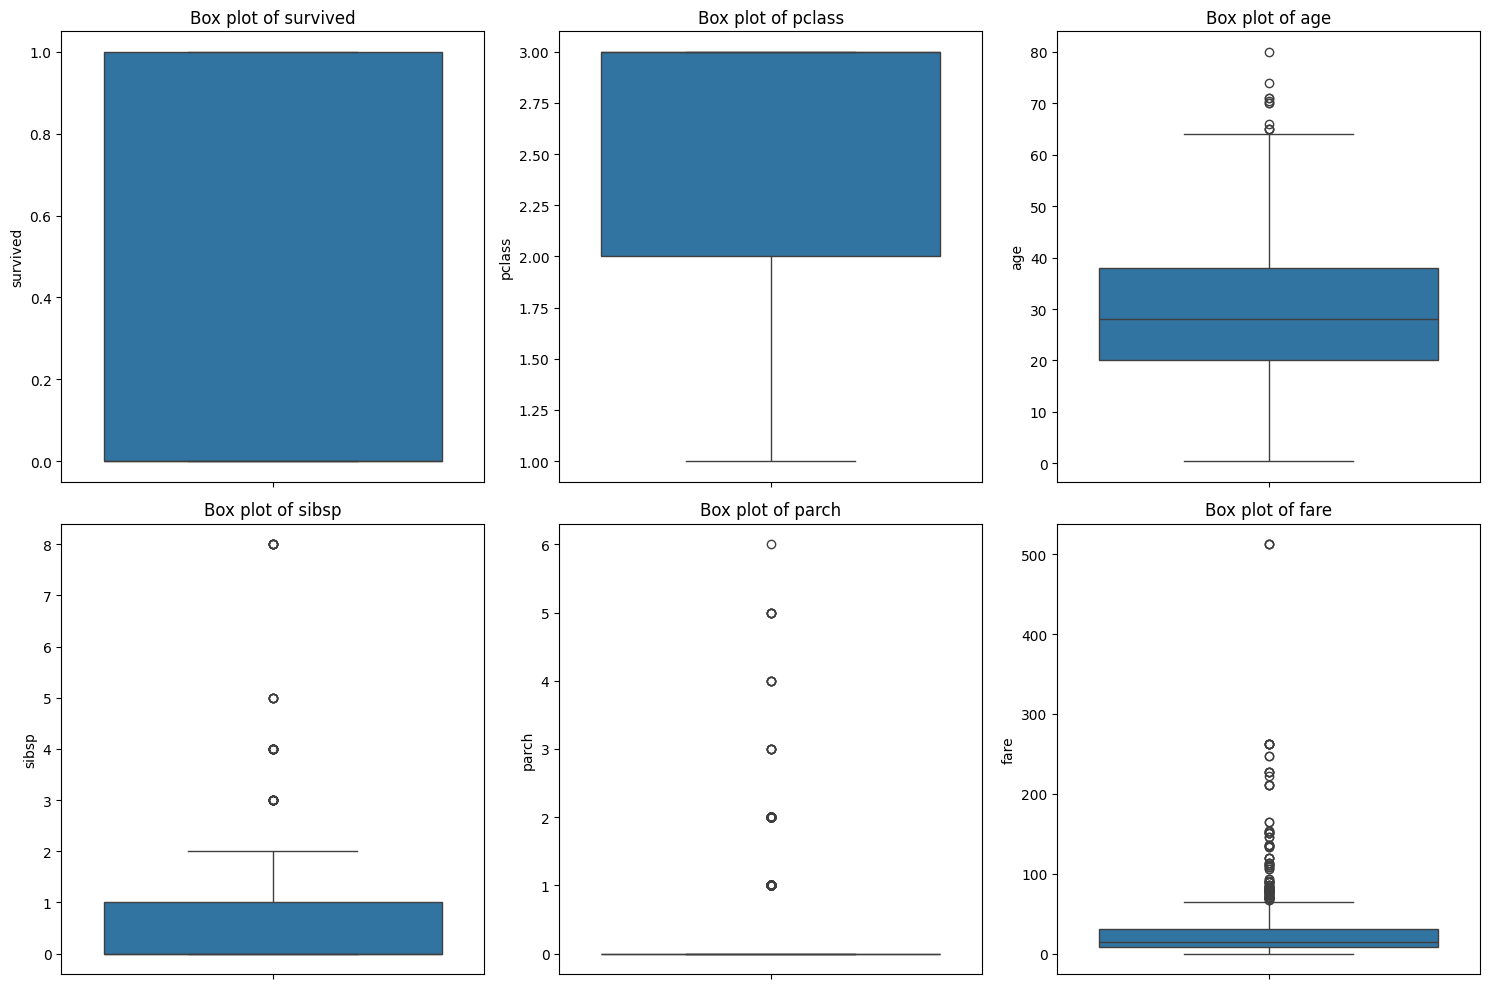

In [12]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the titanic dataset
titanic = sns.load_dataset('titanic')

# Select numerical columns for outlier detection
numerical_cols = titanic.select_dtypes(include=['number']).columns

# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect and print outliers for each numerical column
for col in numerical_cols:
    # Drop NaN values for accurate IQR calculation
    col_data = titanic[col].dropna()
    if not col_data.empty:
        outliers = detect_outliers_iqr(pd.DataFrame(col_data), col)
        print(f"Outliers in column '{col}':")
        print(outliers)
        print("-" * 30)

# Plotting box plots to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, (len(numerical_cols) + 1) // 2, i + 1)
    sns.boxplot(y=titanic[col])
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()
